In [9]:
import sys
sys.path.append("..")
import torch
import random
import d2l.torch as d2l

features: tensor([0.7639, 0.6318]) 
label: tensor([3.5796])


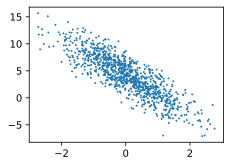

In [10]:
'''
1.生成数据集
数据集特性：
(1).2个特征,1000个样本 (每个样本包含从标准正态分布中采样的2个特征)
(2).y=Xw+b+ϵ w=[2,−3.4]⊤ , b=4.2 ϵ是捕获样本和标签时产生的误差,假设误差符合正态分布,均值为0,标准差为0.01
'''


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, torch.reshape(y, (-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0], '\nlabel:', labels[0])

d2l.set_figsize()

d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels),1);  #plt.scatter(x, y, s, c ,marker, alpha) x,y: x轴与y轴的数据 s: 点的面积


In [11]:
'''
2.读取数据集
'''

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.0922, -1.0615],
        [ 1.8245,  1.0903],
        [ 0.1331,  1.0243],
        [ 0.9277,  0.9178],
        [-1.9080,  0.2113],
        [-0.4442,  0.9920],
        [-0.7330, -0.3996],
        [-0.2252,  0.9453],
        [-0.1017, -0.1524],
        [ 0.2539,  0.6109]]) 
 tensor([[ 7.9921],
        [ 4.1382],
        [ 0.9999],
        [ 2.9324],
        [-0.3305],
        [-0.0805],
        [ 4.0652],
        [ 0.5292],
        [ 4.5126],
        [ 2.6232]])


In [12]:
'''初始化模型参数'''
w = torch.normal(0,0.01,(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
print(w)
print(b)

tensor([[-0.0002],
        [ 0.0009]], requires_grad=True)
tensor([0.], requires_grad=True)


In [13]:
'''定义模型'''

'线性回归模型'
def linreg(X, w, b):

    return torch.matmul(X, w) + b

In [14]:
'''定义损失函数'''

'均方损失'
def squared_loss(y_hat, y):

    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [15]:
'''定义优化算法'''

'小批量随机梯度下降'
def sgd(params, lr, batch_size):

    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


In [16]:
'''训练'''
lr = 0.03
num_epochs = 20
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b],lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 14.744124
epoch 2, loss 14.179338
epoch 3, loss 13.228397
epoch 4, loss 12.730844
epoch 5, loss 12.173644
epoch 6, loss 10.884651
epoch 7, loss 10.513746
epoch 8, loss 9.950057
epoch 9, loss 9.631676
epoch 10, loss 9.268509
epoch 11, loss 9.050870
epoch 12, loss 7.917312
epoch 13, loss 7.331245
epoch 14, loss 7.085685
epoch 15, loss 6.611394
epoch 16, loss 6.393045
epoch 17, loss 6.015669
epoch 18, loss 5.729840
epoch 19, loss 5.320735
epoch 20, loss 4.985552
w的估计误差: tensor([ 1.1970, -2.0060], grad_fn=<SubBackward0>)
b的估计误差: tensor([2.2819], grad_fn=<RsubBackward1>)
